In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2023-10-17 17:32:57.597517: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 17:33:01.221568: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 17:33:01.225572: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 17:33:25.381672: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

<h3>Labels</h3>
0 T-shirt/top<br/>
1 Trouser<br/>
2 Pullover<br/>
3 Dress<br/>
4 Coat<br/>
5 Sandal<br/>
6 Shirt<br/>
7 Sneaker<br/>
8 Bag<br/>
9 Ankle boot

Image label :  5


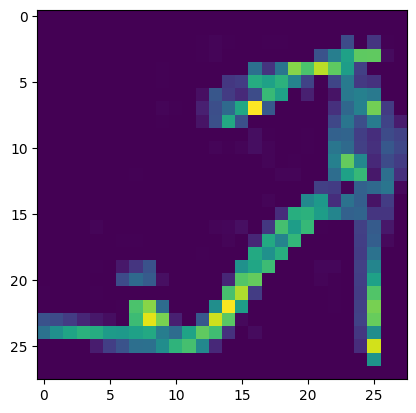

In [3]:
index = 8
image = xtrain[index]
print('Image label : ', ytrain[index])
plt.imshow(image)

In [4]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


<h3>Models</h3>

In [5]:
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [6]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(250, activation = 'relu'),
    keras.layers.Dense(150, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               392500    
                                                                 
 dense_4 (Dense)             (None, 250)               125250    
                                                                 
 dense_5 (Dense)             (None, 150)               37650     
                                                                 
 dense_6 (Dense)             (None, 10)                1510      
                                                                 
Total params: 556910 (2.12 MB)
Trainable params: 556910 (2.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


<h3>Validation and train</h3>

In [7]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

Image label :  3


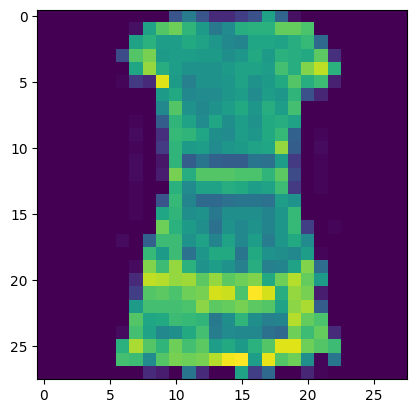

In [8]:
index = 8
image = xtrain[index]
print('Image label : ', ytrain[index])
plt.imshow(image)

<h3>Train Models</h3>

In [9]:
model1.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'sgd',
               metrics = ['accuracy'])
history = model1.fit(xtrain, ytrain, epochs = 30, validation_data = (xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7111 - accuracy: 0.7650 - val_loss: 0.5005 - val_accuracy: 0.8394
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4859 - accuracy: 0.8294 - val_loss: 0.4547 - val_accuracy: 0.8434
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4427 - accuracy: 0.8442 - val_loss: 0.4185 - val_accuracy: 0.8540
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4164 - accuracy: 0.8542 - val_loss: 0.4293 - val_accuracy: 0.8440
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3958 - accuracy: 0.8622 - val_loss: 0.3865 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3826 - accuracy: 0.8647 - val_loss: 0.3732 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3693 - accuracy: 0.8692 - val_loss: 0.3620 - val_accurac

In [10]:
model2.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])
history2 = model2.fit(xtrain, ytrain, epochs = 20, validation_data = (xvalid, yvalid))

Epoch 1/20
1719/1719 [==============================] - 20s 11ms/step - loss: 0.4856 - accuracy: 0.8230 - val_loss: 0.3780 - val_accuracy: 0.8634
Epoch 2/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3677 - accuracy: 0.8646 - val_loss: 0.3366 - val_accuracy: 0.8740
Epoch 3/20
1719/1719 [==============================] - 18s 11ms/step - loss: 0.3307 - accuracy: 0.8782 - val_loss: 0.3331 - val_accuracy: 0.8724
Epoch 4/20
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3082 - accuracy: 0.8849 - val_loss: 0.3207 - val_accuracy: 0.8868
Epoch 5/20
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2889 - accuracy: 0.8931 - val_loss: 0.3005 - val_accuracy: 0.8894
Epoch 6/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2734 - accuracy: 0.8980 - val_loss: 0.3053 - val_accuracy: 0.8888
Epoch 7/20
1719/1719 [==============================] - 18s 10ms/step - loss: 0.2611 - accuracy: 0.9015 - val_loss: 0.2915 - 

<h3>Models Evaluation</h3>

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


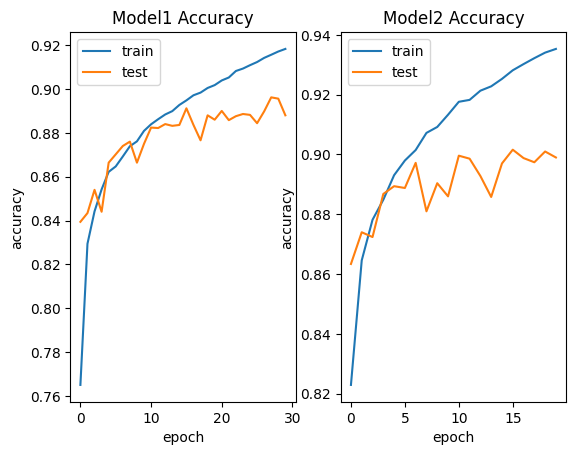

In [14]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')

plt.subplot(1,2,2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model2 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')

plt.show()

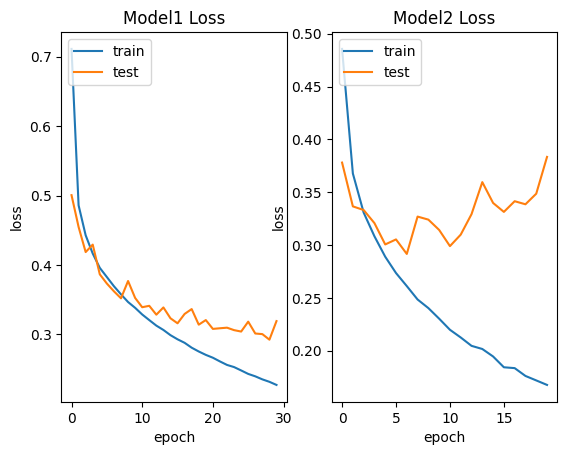

In [15]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model1 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')

plt.subplot(1,2,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model2 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')

plt.show()

<h3>Model 1 Evaluation</h3>

In [17]:
_, train_acc = model1.evaluate(xtrain, ytrain, verbose = 0)
_, test_acc = model1.evaluate(xtest, ytest, verbose = 0)
print("Train Accuracy : ", train_acc)
print("Test Accuracy : ", test_acc)

Train Accuracy :  0.9135090708732605
Test Accuracy :  0.8166999816894531


<h3>Model 2 Evaluation</h3>

In [18]:
_, train_acc = model2.evaluate(xtrain, ytrain, verbose = 0)
_, test_acc = model2.evaluate(xtest, ytest, verbose = 0)
print("Train Accuracy : ", train_acc)
print("Test Accuracy : ", test_acc)

Train Accuracy :  0.9420545697212219
Test Accuracy :  0.8781999945640564


>Model 1 is appropriate but Model 2 is kindda overfit

<h3>Test data comparison</h3>

In [27]:
data = xtest[15:30]
y_cat = ytest[15:30]

In [33]:
pred_1 = model1.predict(xtest)
pred_2 = model2.predict(xtest)

313/313 [==============================] - 1s 4ms/step


In [34]:
classes_1 = np.argmax(pred_1, axis = 1)
classes_2 = np.argmax(pred_2, axis = 1)

In [24]:
import pandas as pd

In [41]:
actual = np.array([])
filter_1 = np.array([])
filter_2 = np.array([])
for i in range(len(xtest)):
    if classes_1[i] != classes_2[i]:
        actual = np.append(actual, ytest[i])
        filter_1 = np.append(filter_1,classes_1[i])
        filter_2 = np.append(filter_2,classes_2[i])        

In [43]:
com = pd.DataFrame({
    'Actual Label' : actual,
    'Model1 Pred' : filter_1,
    'Model2 Pred' : filter_2
})

In [46]:
com.head(10)

,Actual Label,Model1 Pred,Model2 Pred
0,6.0,4.0,6.0
1,6.0,4.0,6.0
2,3.0,4.0,3.0
3,3.0,0.0,6.0
4,7.0,9.0,7.0
5,6.0,4.0,6.0
6,7.0,9.0,7.0
7,2.0,2.0,4.0
8,2.0,0.0,4.0
9,6.0,0.0,2.0
